<h1>Introduction of Dataset</h1>

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time.

The given Diamond dataset have 10 features and approx 54000 rows or instances. It has the features such as price, carat, cut, clarity, color, x(length), y(width) and z(depth) in order to predict the price of the Diamond based on the given features

<h1>Objective</h1>

The idea is to analyze the dataset and predict the diamond price.💎

In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv("D:\\Innomatics_July_Internship\\Machine Learning Project\\Task_2-ML_Application\\diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# reindex the columns of dataset for making dataset more understandable
df = df.reindex(columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price'])
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


<h2><i>Data Exploration</i></h2>

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<h2><i>Data Cleaning</i></h2>

In [7]:
# checking null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
# checking the duplicate values
df.duplicated().sum()

146

In [9]:
df= df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

<h4>Observation</h4><ul><li>Checking for duplicates we see some duplicate values and remove it from the dataset.</ul>

In [11]:
# checking descriptive statistics
df.describe()

,carat,depth,table,x,y,z,price
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714,3933.065082
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037,3988.114460
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000,5326.750000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


<h4>Observation</h4><ul><li>Describe function display all the descriptive statistical values of the dataset features.</ul>

<h2><i>Univariate Analysis</i></h2>

<AxesSubplot:>

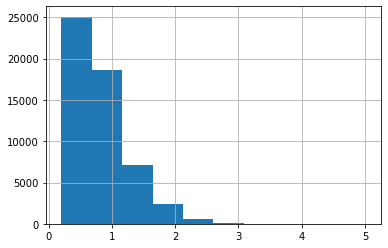

In [12]:
df['carat'].hist()

<AxesSubplot:>

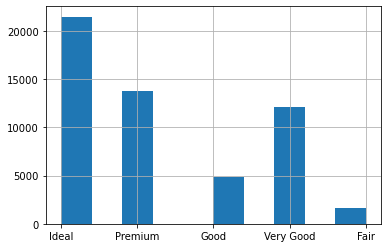

In [13]:
df['cut'].hist()

<AxesSubplot:>

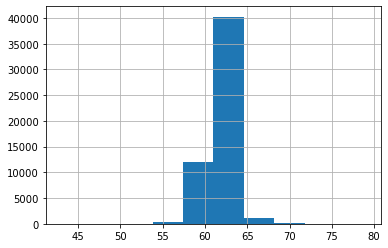

In [14]:
df['depth'].hist()

<AxesSubplot:>

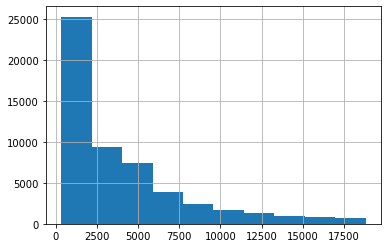

In [15]:
df['price'].hist()

<h2><i>Bivariate Analysis</i></h2>

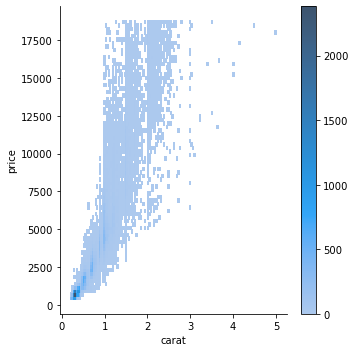

In [16]:
# plotting a bar graph for gender against Income to see the correlation between these columns 
sns.displot(data=df, x='carat', y='price', cbar=True)

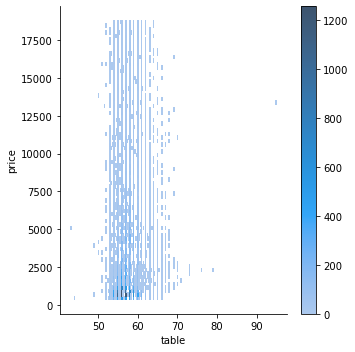

In [17]:
# plotting a bar graph for occupation against Income to see the correlation between these columns 
sns.displot(data=df, x='table', y='price',cbar=True)

In [18]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


<Figure size 1080x720 with 0 Axes>

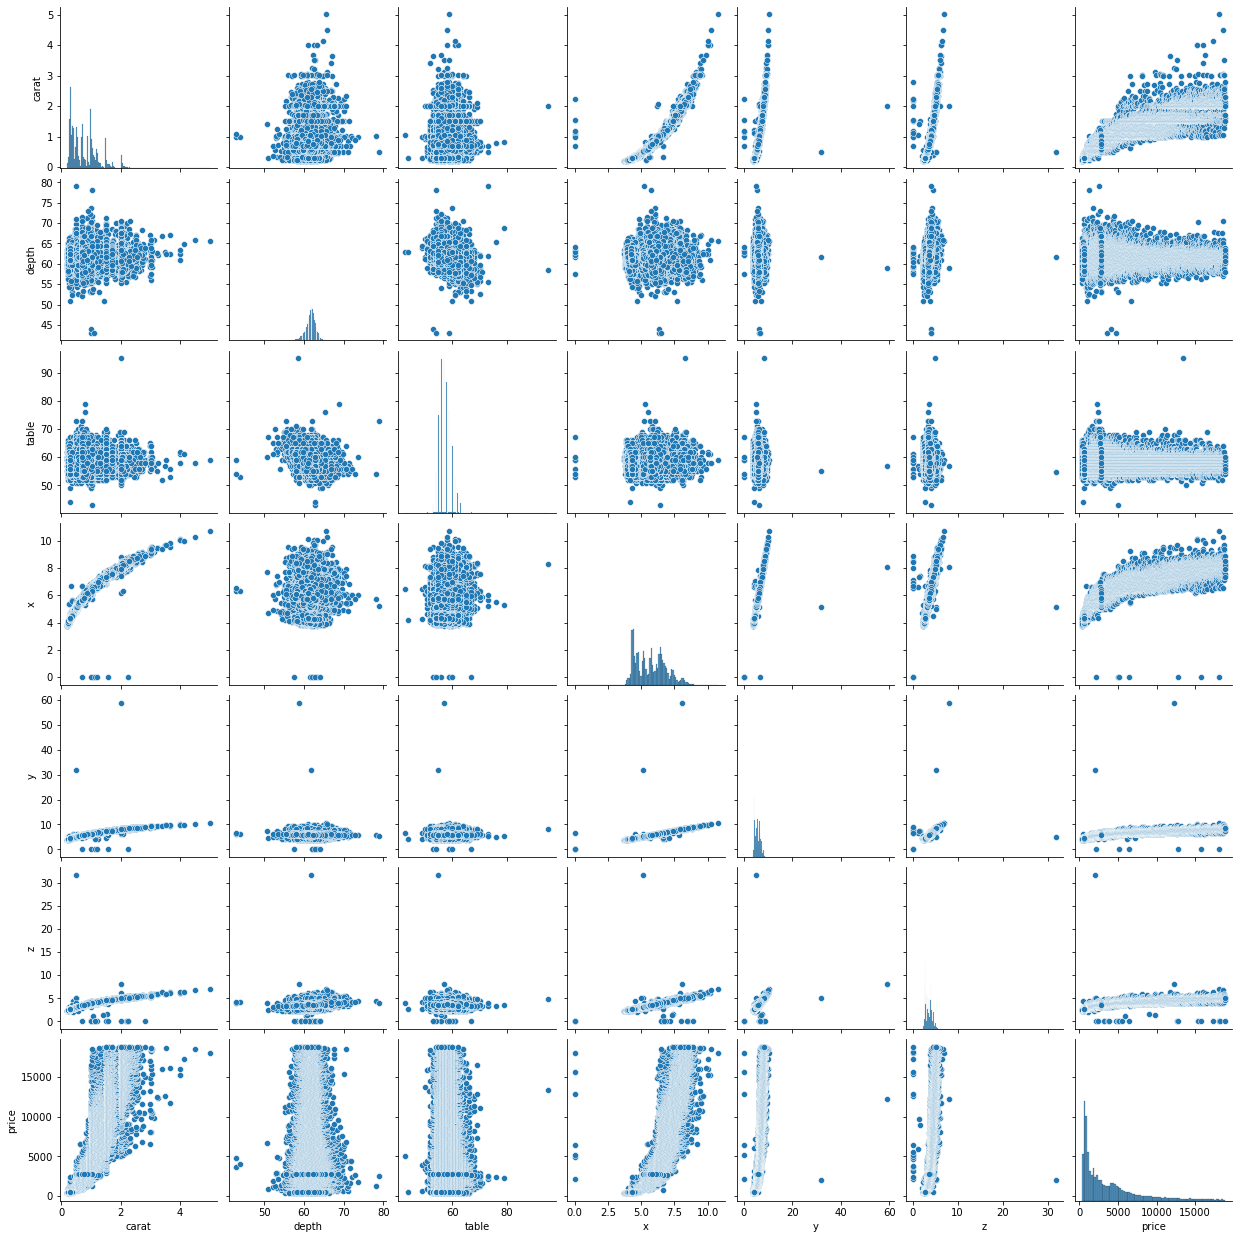

In [19]:
# pairwise scatter plot

plt.figure(figsize=(15, 10))
sns.pairplot(df_numeric)
plt.show()

In [20]:
# correlation matrix
corr = df_numeric.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.027861,0.181091,0.975380,0.951908,0.953542,0.921548
depth,0.027861,1.000000,-0.297669,-0.025348,-0.029389,0.094757,-0.011048
table,0.181091,-0.297669,1.000000,0.194855,0.183231,0.150270,0.126566
x,0.975380,-0.025348,0.194855,1.000000,0.974592,0.970686,0.884504
y,0.951908,-0.029389,0.183231,0.974592,1.000000,0.951844,0.865395
z,0.953542,0.094757,0.150270,0.970686,0.951844,1.000000,0.861208
price,0.921548,-0.011048,0.126566,0.884504,0.865395,0.861208,1.000000


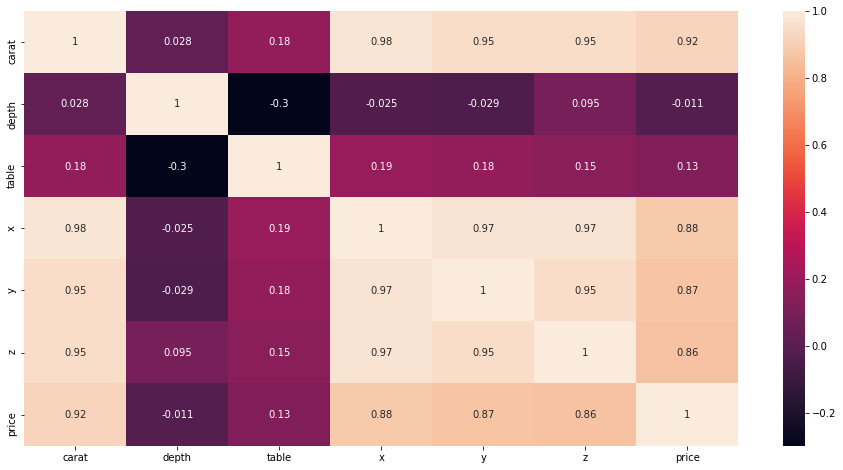

In [21]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()

<h4>Observation</h4><ul><li>From the above heatmap we can observe that there is high correlation between length, width, depth, carat and price.

<h2><i>Data Preparation</i></h2>

In [22]:
# Identifying the inputs(x) and output(y)

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

In [23]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 0)

In [24]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
38685,0.30,Ideal,F,VVS1,61.1,55.0,4.36,4.38,2.67
6026,1.00,Very Good,D,SI2,63.2,56.0,6.38,6.33,4.02
26499,2.01,Very Good,H,SI2,63.4,57.0,8.00,7.93,5.05
28444,0.31,Ideal,G,VVS2,61.5,57.0,4.32,4.36,2.67
16616,1.21,Premium,H,SI1,60.2,58.0,6.93,6.88,4.16
...,...,...,...,...,...,...,...,...,...
46028,0.57,Premium,I,VVS1,62.1,58.0,5.32,5.25,3.28
52561,0.70,Ideal,G,VS2,62.1,57.0,5.66,5.70,3.53
42745,0.51,Good,E,SI1,63.5,54.0,5.07,5.10,3.23
43704,0.58,Ideal,D,SI2,61.2,57.0,5.38,5.41,3.30


In [25]:
y_train

38685     1041
6026      3965
26499    16111
28444      671
16616     6640
         ...  
46028     1728
52561     2536
42745     1343
43704     1436
2738      3247
Name: price, Length: 40345, dtype: int64

In [26]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
28297,0.24,Ideal,I,VVS1,62.3,57.0,3.98,3.95,2.47
17356,1.01,Ideal,G,VS2,62.6,56.0,6.41,6.44,4.02
48882,0.73,Premium,J,VS1,60.2,58.0,5.87,5.82,3.52
19901,1.05,Ideal,D,VS2,61.0,56.0,6.54,6.61,4.01
44377,0.52,Very Good,G,VS1,61.8,58.0,5.19,5.16,3.20
...,...,...,...,...,...,...,...,...,...
23346,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66
25751,1.52,Ideal,G,VS2,61.4,56.0,7.39,7.47,4.56
9447,1.02,Very Good,F,SI1,63.0,58.0,6.36,6.40,4.02
13489,1.16,Very Good,H,VS2,63.0,57.0,6.64,6.66,4.19


In [27]:
y_test

28297      432
17356     6964
48882     2037
19901     8451
44377     1581
         ...  
23346      422
25751    14692
9447      4594
13489     5537
42434     1314
Name: price, Length: 13449, dtype: int64

In [28]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [29]:
# separating train categorical column
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat

,cut,color,clarity
38685,Ideal,F,VVS1
6026,Very Good,D,SI2
26499,Very Good,H,SI2
28444,Ideal,G,VVS2
16616,Premium,H,SI1
...,...,...,...
46028,Premium,I,VVS1
52561,Ideal,G,VS2
42745,Good,E,SI1
43704,Ideal,D,SI2


In [30]:
# separating train numerical column
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num

,carat,depth,table,x,y,z
38685,0.30,61.1,55.0,4.36,4.38,2.67
6026,1.00,63.2,56.0,6.38,6.33,4.02
26499,2.01,63.4,57.0,8.00,7.93,5.05
28444,0.31,61.5,57.0,4.32,4.36,2.67
16616,1.21,60.2,58.0,6.93,6.88,4.16
...,...,...,...,...,...,...
46028,0.57,62.1,58.0,5.32,5.25,3.28
52561,0.70,62.1,57.0,5.66,5.70,3.53
42745,0.51,63.5,54.0,5.07,5.10,3.23
43704,0.58,61.2,57.0,5.38,5.41,3.30


<h3>Normalization</h3>

In [31]:
X_train_cat['cut'].value_counts(normalize=True)

Ideal        0.399058
Premium      0.256959
Very Good    0.223720
Good         0.090767
Fair         0.029496
Name: cut, dtype: float64

In [32]:
X_train_cat['color'].value_counts(normalize=True)

G    0.208750
E    0.182104
F    0.177122
H    0.153402
D    0.126410
I    0.100706
J    0.051506
Name: color, dtype: float64

In [33]:
X_train_cat['clarity'].value_counts(normalize=True)

SI1     0.242756
VS2     0.229248
SI2     0.168819
VS1     0.150675
VVS2    0.094659
VVS1    0.067171
IF      0.032891
I1      0.013781
Name: clarity, dtype: float64

In [34]:
X_train_cat_le = pd.DataFrame(index= X_train_cat.index)
X_train_cat_le.head()

""
38685
6026
26499
28444
16616


In [35]:
X_train_cat.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], dtype=object)

In [36]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda k : cut_encoder[k])
X_train_cat_le

,cut
38685,4
6026,3
26499,3
28444,4
16616,5
...,...
46028,5
52561,4
42745,2
43704,4


In [37]:
X_train_cat.color.unique()

array(['F', 'D', 'H', 'G', 'I', 'E', 'J'], dtype=object)

In [38]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda z : color_encoder[z])
X_train_cat_le

,cut,color
38685,4,5
6026,3,7
26499,3,3
28444,4,4
16616,5,3
...,...,...
46028,5,2
52561,4,4
42745,2,6
43704,4,7


In [39]:
X_train_cat.clarity.unique()

array(['VVS1', 'SI2', 'VVS2', 'SI1', 'I1', 'VS2', 'IF', 'VS1'],
      dtype=object)

In [40]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda z : clarity_encoder[z])
X_train_cat_le.head()

,cut,color,clarity
38685,4,5,7
6026,3,7,2
26499,3,3,2
28444,4,4,6
16616,5,3,3


In [41]:
X_train_num.head()

,carat,depth,table,x,y,z
38685,0.30,61.1,55.0,4.36,4.38,2.67
6026,1.00,63.2,56.0,6.38,6.33,4.02
26499,2.01,63.4,57.0,8.00,7.93,5.05
28444,0.31,61.5,57.0,4.32,4.36,2.67
16616,1.21,60.2,58.0,6.93,6.88,4.16


In [42]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table,x,y,z
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781


In [43]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,4,5,7
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,3,7,2
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,3,3,2
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,4,4,6
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,5,3,3


In [44]:
# test data preparation
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
28297,0.24,Ideal,I,VVS1,62.3,57.0,3.98,3.95,2.47
17356,1.01,Ideal,G,VS2,62.6,56.0,6.41,6.44,4.02
48882,0.73,Premium,J,VS1,60.2,58.0,5.87,5.82,3.52
19901,1.05,Ideal,D,VS2,61.0,56.0,6.54,6.61,4.01
44377,0.52,Very Good,G,VS1,61.8,58.0,5.19,5.16,3.20


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13449 entries, 28297 to 42434
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13449 non-null  float64
 1   cut      13449 non-null  object 
 2   color    13449 non-null  object 
 3   clarity  13449 non-null  object 
 4   depth    13449 non-null  float64
 5   table    13449 non-null  float64
 6   x        13449 non-null  float64
 7   y        13449 non-null  float64
 8   z        13449 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [46]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat

,cut,color,clarity
28297,Ideal,I,VVS1
17356,Ideal,G,VS2
48882,Premium,J,VS1
19901,Ideal,D,VS2
44377,Very Good,G,VS1
...,...,...,...
23346,Ideal,G,SI2
25751,Ideal,G,VS2
9447,Very Good,F,SI1
13489,Very Good,H,VS2


In [47]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,carat,depth,table,x,y,z
28297,0.24,62.3,57.0,3.98,3.95,2.47
17356,1.01,62.6,56.0,6.41,6.44,4.02
48882,0.73,60.2,58.0,5.87,5.82,3.52
19901,1.05,61.0,56.0,6.54,6.61,4.01
44377,0.52,61.8,58.0,5.19,5.16,3.20


In [84]:
X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
28297,-1.176305,0.388869,-0.197182,-1.558624,-1.600353,-1.453165
17356,0.440447,0.597937,-0.639186,0.598959,0.628860,0.646213
48882,-0.147463,-1.074606,0.244823,0.119496,0.073795,-0.031005
19901,0.524434,-0.517091,-0.639186,0.714386,0.781055,0.632669
44377,-0.588395,0.040423,0.244823,-0.484272,-0.517081,-0.464425


In [49]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)
X_test_cat_le.head()

""
28297
17356
48882
19901
44377


In [50]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda z : cut_encoder[z])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda z : color_encoder[z])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda z: clarity_encoder[z])

X_test_cat_le.head()

,cut,color,clarity
28297,4,2,7
17356,4,4,4
48882,5,1,5
19901,4,7,4
44377,3,4,5


In [51]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
X_test_transformed

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867,4,2,7
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929,4,4,4
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973,5,1,5
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511,4,7,4
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350,3,4,5
...,...,...,...,...,...,...,...,...,...
23346,-1.051952,0.104951,-0.207785,-1.295847,-1.238894,-1.264925,4,4,2
25751,1.530497,-0.245138,-0.657431,1.483878,1.510954,1.474503,4,4,4
9447,0.472116,0.875149,0.241860,0.563262,0.579835,0.695929,3,5,3
13489,0.768463,0.875149,-0.207785,0.813526,0.806088,0.941035,3,3,4


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = pd.DataFrame(scaler.fit_transform(X_train_transformed),
                           columns = X_train_transformed.columns,
                           index = X_train_transformed.index)
X_train_new.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,0.230731,0.346103,1.794657
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,-0.743712,1.521781,-1.248509
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,-0.743712,-0.829575,-1.248509
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,0.230731,-0.241736,1.186024
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,1.205175,-0.829575,-0.639876


In [53]:
X_test_new = pd.DataFrame(scaler.fit_transform(X_test_transformed),
                          columns = X_test_transformed.columns,
                          index = X_test_transformed.index)
X_test_new.head()

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.176305,0.388869,-0.197182,-1.558624,-1.600353,-1.453165,0.242145,-1.405551,1.776780
17356,0.440447,0.597937,-0.639186,0.598959,0.628860,0.646213,0.242145,-0.229683,-0.032374
48882,-0.147463,-1.074606,0.244823,0.119496,0.073795,-0.031005,1.216009,-1.993485,0.570677
19901,0.524434,-0.517091,-0.639186,0.714386,0.781055,0.632669,0.242145,1.534119,-0.032374
44377,-0.588395,0.040423,0.244823,-0.484272,-0.517081,-0.464425,-0.731720,-0.229683,0.570677


In [54]:
print("X_train:",X_train_new.shape,"\nX_test:" ,X_test_new.shape,"\ny_train:",y_train.shape,"\ny_test:",y_test.shape)

X_train: (40345, 9) 
X_test: (13449, 9) 
y_train: (40345,) 
y_test: (13449,)


<h2><i>Data Modelling and Evaluation</i></h2>

<h3 style="color:DarkSlateBlue">K Nearest Neighbour (KNN) Regressor</h3>

In [55]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_new, y_train)

KNeighborsRegressor()

In [56]:
y_pred_knn = regressor.predict(X_test_new)

In [57]:
temp_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
temp_knn.head()

,Actual,Predicted
28297,432,584.8
17356,6964,6158.0
48882,2037,2235.8
19901,8451,9063.4
44377,1581,1669.8


In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_knn)

0.9640472945049022

In [58]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error:  379.85424938657155
Mean Squared Error:  573049.9473418099
Root Mean Squared Error:  757.0006257208839


<h3 style="color:DarkSlateBlue">Linear Regression</h3>

In [59]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_new, y_train)

LinearRegression()

In [60]:
y_pred_lr = linear_regressor.predict(X_test_new)

In [61]:
temp_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
temp_lr.head()

,Actual,Predicted
28297,432,164.028200
17356,6964,5458.520971
48882,2037,2668.529124
19901,8451,6888.188298
44377,1581,1620.580949


In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)

0.9047996270118979

In [62]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error:  808.1135772353333
Mean Squared Error:  1517398.1478303808
Root Mean Squared Error:  1231.82715826141


<h3 style="color:DarkSlateBlue">Decision Tree Regressor</h3>

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_new, y_train)

DecisionTreeRegressor()

In [64]:
y_pred_dt = dt_regressor.predict(X_test_new)

In [65]:
temp_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
temp_dt.head()

,Actual,Predicted
28297,432,414.0
17356,6964,6591.0
48882,2037,1998.0
19901,8451,7127.0
44377,1581,1815.0


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dt)

0.9639561616137002

In [66]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

Mean Absolute Error:  383.0723102089375
Mean Squared Error:  574502.5139229683
Root Mean Squared Error:  757.9594408165706


<h3 style="color:DarkSlateBlue">Random Forest Regressor</h3>

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_new, y_train)

RandomForestRegressor()

In [68]:
y_pred_rf = rf_regressor.predict(X_test_new)

In [69]:
temp_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
temp_rf.head()

,Actual,Predicted
28297,432,458.93
17356,6964,6276.31
48882,2037,2118.28
19901,8451,7937.90
44377,1581,1731.30


In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_rf)

0.9802142699350364

In [70]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error:  285.05763231467023
Mean Squared Error:  315364.6273822886
Root Mean Squared Error:  561.5733499573219


<h3 style="color:DarkSlateBlue">XGB Regressor</h3>

In [77]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_new, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
y_pred_xgb = xgb.predict(X_test_new)

In [79]:
temp_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
temp_xgb.head()

,Actual,Predicted
28297,432,392.534027
17356,6964,6249.617676
48882,2037,1970.806519
19901,8451,7807.473633
44377,1581,1666.604126


In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_xgb)

0.9792688670429189

In [81]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error:  289.06199882212906
Mean Squared Error:  330433.39814888826
Root Mean Squared Error:  574.8333655494332


<h3 style="color:DarkSlateBlue">Comparing the results</h3>

In [86]:
from tabulate import tabulate

table = [['Model', 'KNN', 'Linear Regression','Decision Tree','Random Forest','XGB Regressor'], 
         ['Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred_knn),metrics.mean_absolute_error(y_test, y_pred_lr),metrics.mean_absolute_error(y_test, y_pred_dt),metrics.mean_absolute_error(y_test, y_pred_rf),metrics.mean_absolute_error(y_test, y_pred_xgb)],
         ['RMS Error',np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))],
        ['R2_score',r2_score(y_test,y_pred_knn),r2_score(y_test,y_pred_lr),r2_score(y_test,y_pred_dt),r2_score(y_test,y_pred_rf),r2_score(y_test,y_pred_xgb)]]
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+---------------------+------------+---------------------+-----------------+-----------------+-----------------+
| Model               |        KNN |   Linear Regression |   Decision Tree |   Random Forest |   XGB Regressor |
+=====================+============+=====================+=================+=================+=================+
| Mean Absolute Error | 379.854    |            808.114  |      383.072    |      285.058    |      289.062    |
+---------------------+------------+---------------------+-----------------+-----------------+-----------------+
| RMS Error           | 757.001    |           1231.83   |      757.959    |      561.573    |      574.833    |
+---------------------+------------+---------------------+-----------------+-----------------+-----------------+
| R2_score            |   0.964047 |              0.9048 |        0.963956 |        0.980214 |        0.979269 |
+---------------------+------------+---------------------+-----------------+-----------------+--

<h1><i>Conclusion</i></h1>
<ul><li>Here, Random Forest Model works as the most efficient model for price pridiction of Diamond.</ul>

In [87]:
from pickle import dump

dump(scaler, open('D:\Innomatics_July_Internship\Machine Learning Project\Task_2-ML_Application\models\standard_scaler.pkl', 'wb'))
dump(regressor, open('D:\Innomatics_July_Internship\Machine Learning Project\Task_2-ML_Application\models\knn_model.pkl', 'wb'))
dump(linear_regressor, open('D:\Innomatics_July_Internship\Machine Learning Project\Task_2-ML_Application\models\lr_model.pkl', 'wb'))
dump(dt_regressor, open('D:\Innomatics_July_Internship\Machine Learning Project\Task_2-ML_Application\models\dt_model.pkl', 'wb'))
dump(rf_regressor, open('D:\Innomatics_July_Internship\Machine Learning Project\Task_2-ML_Application\models\sv_model.pkl', 'wb'))
dump(xgb, open('D:\\Innomatics_July_Internship\\Machine Learning Project\\Task_2-ML_Application\\models\\xg_model.pkl', 'wb'))